# Chapter 03. Deepter Look at Gradient Descent
- Review Hypothesis Function
- Check the data that we will use
- Understand Cost Function
- Gradient Descent Theory
- Gradient Descent Code
- Gradient Descent Code with nn.optim

---

In [1]:
import torch

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

## I. Hypothesis (Linear Regression)
Describe the format of neural network. </br>
Tell us which output y we would predict for x. </br>
Expressed as H(x).

$$ H(x) = Wx + b $$

It is just a simple Linear Function. </br>
Train W, b to Optimize for the given data.

In [3]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)
hypothesis = x_train * W + b

### Simpler Hypothesis Function
In this notebook, we will define simple neural network to understand Gradient Descent.
> No Bias!

$$ H(x) = Wx $$

In [38]:
W = torch.zeros(1, requires_grad = True)
# b = torch.zeros(1, requires_grad = True)
hypothesis = x_train * W + b

---

# II. Data - Dummy Data

|Hours(x)|Points(y)|
|---|---|
|1|1|
|2|2|
|3|3|

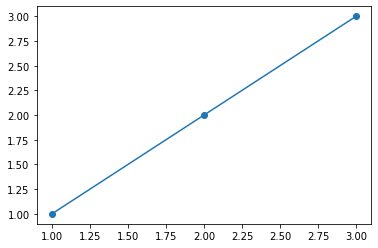

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
xs = np.linspace(1, 3, 100)
plt.plot(xs, xs)

Input = Output!

1 -> Model -> 1(prediction)

In [5]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

### What is the best model?
- H(x) = x is the best model.
    - outputs and inputs are the same
- W = 1 is the best number.
    - the goal when W is not 1: to converge W to 1

How can you evaluate whether the model is good or bad?

the answer is: to define cost function.

---

## III. Cost Function
### Intuition
- when W is 1, cost is 0
- the further W value away from 1, the higher the cost function.
    - the further W value away from 1: prediction value and real value is different

$$ H(x) = Wx $$

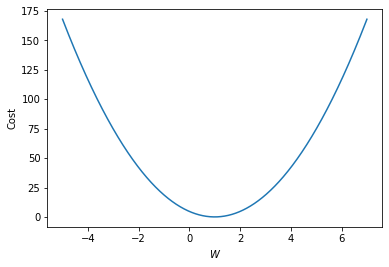

In [18]:
W_l = np.linspace(-5, 7, 1000)
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_l.append(cost.item())

plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

### MSE (Mean Squared Error)
show the difference between real value and prediction

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

In [39]:
cost = torch.mean((hypothesis - y_train) ** 2)

---

## IV. Gradient Descent
### Intuition

- have to minimize the cost of cost function.
- go down to the curve.
- the bigger the descent is, the further go down to the curve.
- calculate "*Gradient*" !

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

- if Gradient **< 0**
    - w have to be bigger
- if Gradient **> 0**
    - w have to be smaller
- Gradient(slope) is **big**
    - cost ↑
    - change W bigger
- Gradient(slope) closer to **0**
    - near to 0
    - change W a little

### The Math

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$
$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$
$$ W := W - \alpha \nabla W $$

> $a$: Learning Rate 

> $\nabla W$: Gradient

- after all, the cost function is a quadratic function for W
    - you can calculate with simple Simple differential equation.

- gradient > 0
    - W ↑
- gradient < 0
    - W↓

---

## V. Gradient Descent Code

$ W := W - \alpha \nabla W $

In [45]:
gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W -= lr * gradient

### Full Code

In [44]:
# data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# initialize model
W = torch.zeros(1)

# set learning rate
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # calculate H(x)
    hypothesis = x_train * W
    
    # calculate cost gradient
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))
    
    # improve H(x) with cost gradient
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


> *Epoch*: Number of times learned from data.

- As we learn(Epoch is getting bigger), we're getting...
    - W closer to 1
    - reduced cost

---

## VI. Gradient Descent with ```torch.optim```

- you can code gradient descent with ```torch.optim``` module
    - at first, define *optimizer*
        - you have to know data to train and learning rate
    - *optimizer.zero_grad()*: initialize gradient to 0
    - *cost.backward()*: calculate gradient
        - Differentiate the cost value.
        - Gradient stores each variable.
    - *optimizer.step()*: run gradient descent

In [36]:
# set optimizer
optimizer = torch.optim.SGD([W], lr=0.15)

# make better H(x) with cost
optimizer.zero_grad()
cost.backward()
optimizer.step()

> $W$: only one variable able to train

> in this code, gradient stores w - that means it updates w to fit gradient.

### Full Code

In [47]:
# data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# initialize model
W = torch.zeros(1, requires_grad = True)

# set optimizer
optimizer = torch.optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # calculate H(x)
    hypothesis = x_train * W
    
    # calculate cost gradient
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))
    
    # improve H(x) with cost gradient
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746667
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000
